## Spectral clustering

## 1.	Spectral Clustering

#### Algorithm to compute it

* Calculate the Laplacian L (or the normalized Laplacian)
* Calculate the first k eigenvectors (the eigenvectors corresponding to the k smallest eigenvalues of L)
* Consider the matrix formed by the first k eigenvectors; the l-th row defines the features of graph node l
* Cluster the graph nodes based on these features (e.g., using k-means clustering).

In [61]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18260\3070596140.py:7: UserWarning: DelftStack
  warnings.warn('DelftStack')


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18260\4176407425.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap("viridis", n_clusters))


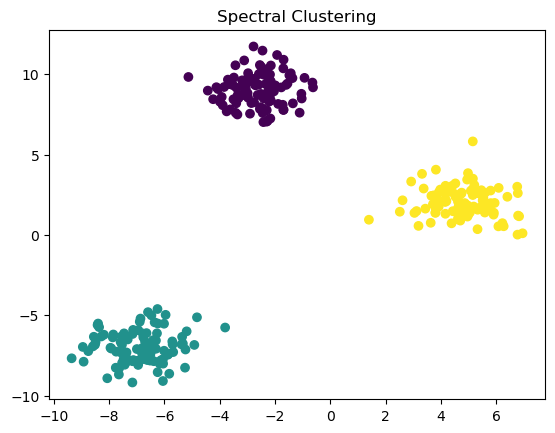

In [62]:
# Generate some sample data
n_samples = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Create a similarity matrix (e.g., using radial basis function kernel)
def rbf_kernel(X, gamma=1.0):
    n = X.shape[0]
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            similarity = np.exp(-gamma * np.linalg.norm(X[i] - X[j])**2)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    return similarity_matrix

gamma = 1.0
similarity_matrix = rbf_kernel(X, gamma)

# Perform spectral clustering
n_clusters = 3  # Number of clusters
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = sc.fit_predict(similarity_matrix)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap("viridis", n_clusters))
plt.title("Spectral Clustering")
plt.show()


## 2. DBSCAN method

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

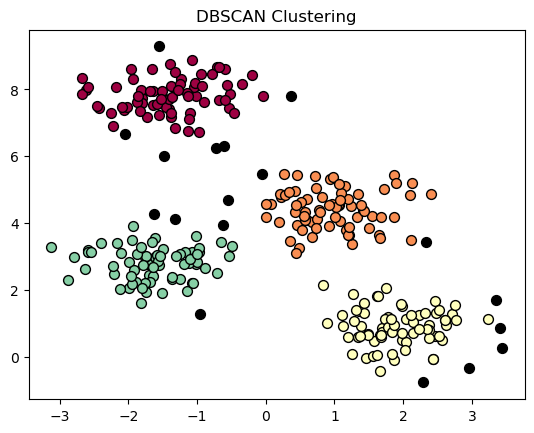

In [64]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X)

# Get cluster labels (-1 represents noise points)
labels = dbscan.labels_

# Create a scatter plot of the data points with color-coded clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=50, edgecolor='k')

plt.title('DBSCAN Clustering')
plt.show()


## 4.  Python package

### a.  k-means module using Python and Numpy

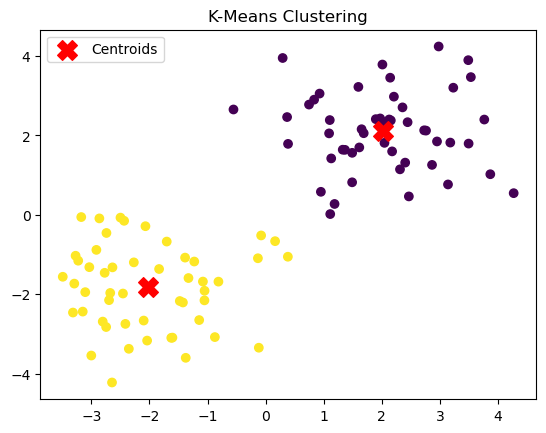

In [117]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iters=500, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize cluster centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each point to the nearest cluster
            labels = self._assign_clusters(X)
            
            # Update cluster centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids
        
        self.labels = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

def main():
    # Generate some random data points for demonstration
    np.random.seed(0)
    data = np.concatenate([np.random.randn(50, 2) + [2, 2], np.random.randn(50, 2) + [-2, -2]])
    
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data)
    
    # Visualize the data points and cluster centroids
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.legend()
    plt.title('K-Means Clustering')
    plt.show()

if __name__ == "__main__":
    main()



### b. k-mediods module using Python and Numpy

In [13]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import pairwise_distances_argmin_min

class KMedoids(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)

        # Initialize medoids randomly
        n_samples, n_features = X.shape
        medoids_idx = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        medoids = X[medoids_idx]

        for _ in range(self.max_iter):
            # Assign each point to the nearest medoid
            labels, distances = pairwise_distances_argmin_min(X, medoids)
            
            # Compute the new medoids as the point with the minimum total distance
            new_medoids = np.empty_like(medoids)
            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                total_distances = np.sum(pairwise_distances_argmin_min(cluster_points, cluster_points)[1])
                best_medoid_idx = np.argmin(total_distances)
                new_medoids[i] = cluster_points[best_medoid_idx]

            # Check for convergence
            if np.all(new_medoids == medoids):
                break

            medoids = new_medoids

        self.medoids_ = medoids
        self.labels_ = labels

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_


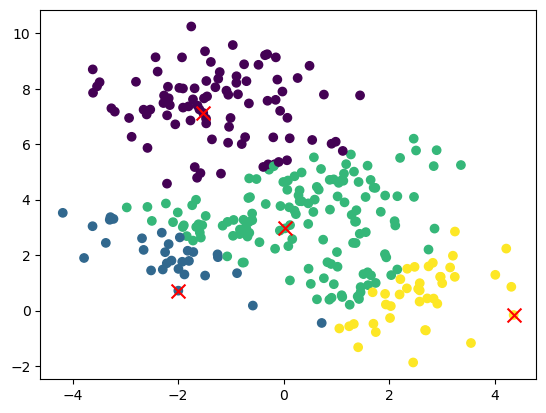

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# Fit the KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=0)
labels = kmedoids.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmedoids.medoids_[:, 0], kmedoids.medoids_[:, 1], c='red', marker='x', s=100)
plt.show()

## 5. Modules in unsupervised to cluster some toy data. 

#### a. Code snippet to create scattered data X

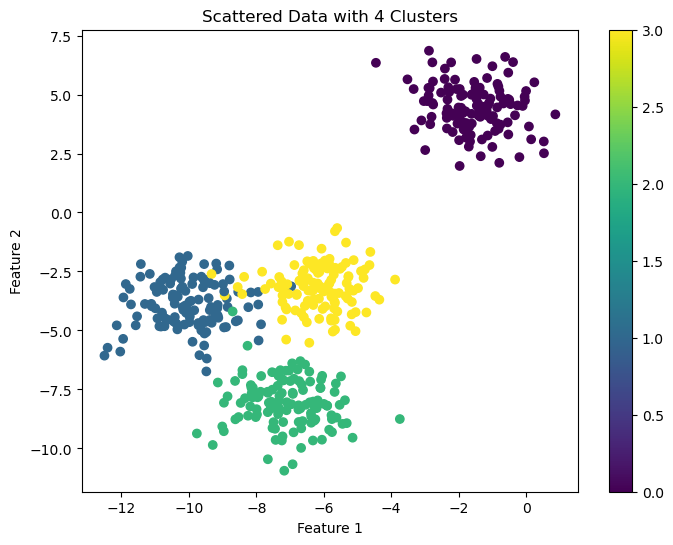

Number of clusters: 4


In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create scattered data
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

# Plot the scattered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Scattered Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Count the number of clusters
num_clusters = len(set(y))
print(f'Number of clusters: {num_clusters}')


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


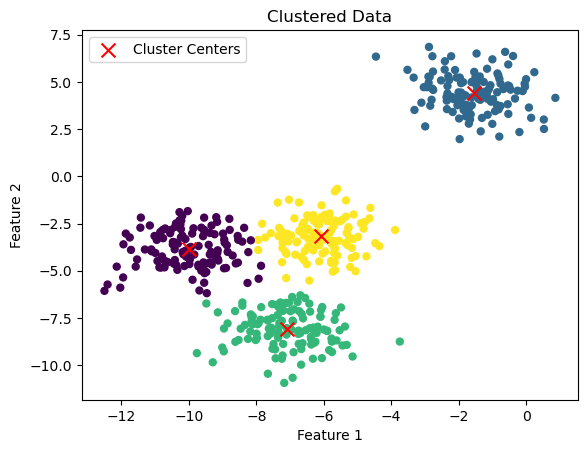

In [23]:
# Use K-means clustering to identify clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the scattered data with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o', s=25, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#### Distance from each other

In [33]:
import numpy as np
from scipy.spatial.distance import euclidean

# Calculate pairwise distances within each cluster
cluster_distances = []
for cluster_id in range(4):
    cluster_points = X[y == cluster_id]
    pairwise_distances = []
    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            distance = euclidean(cluster_points[i], cluster_points[j])
            pairwise_distances.append(distance)
    cluster_distances.append(pairwise_distances)

# Calculate the average distance within each cluster
average_distances = [np.mean(distances) for distances in cluster_distances]

print("Average distance within each cluster:")
for i, avg_distance in enumerate(average_distances):
    print(f"Cluster {i}: {avg_distance}")


Average distance within each cluster:
Cluster 0: 1.7106234583137094
Cluster 1: 1.7886004620399283
Cluster 2: 1.7972021752346738
Cluster 3: 1.6412785317170073


#### The best number of clusters 

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

class KMedoids(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)

        # Initialize medoids randomly
        n_samples, n_features = X.shape
        medoids_idx = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        medoids = X[medoids_idx]

        for _ in range(self.max_iter):
            # Assign each point to the nearest medoid
            labels, distances = pairwise_distances_argmin_min(X, medoids)
            
            # Compute the new medoids as the point with the minimum total distance
            new_medoids = np.empty_like(medoids)
            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                total_distances = np.sum(pairwise_distances_argmin_min(cluster_points, cluster_points)[1])
                best_medoid_idx = np.argmin(total_distances)
                new_medoids[i] = cluster_points[best_medoid_idx]

            # Check for convergence
            if np.all(new_medoids == medoids):
                break

            medoids = new_medoids

        self.medoids_ = medoids
        self.labels_ = labels

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

# Create a range of possible values for K
K_values = range(2, 11)
best_silhouette_score = -1
best_K = -1

# Iterate through different values of K
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=1)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Check if the current silhouette score is better than the previous best
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_K = K

print(f"The best number of clusters (K) is {best_K} with a silhouette score of {best_silhouette_score:.2f}")


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

The best number of clusters (K) is 3 with a silhouette score of 0.65


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## 6. Snippet to create different types of scattered data

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


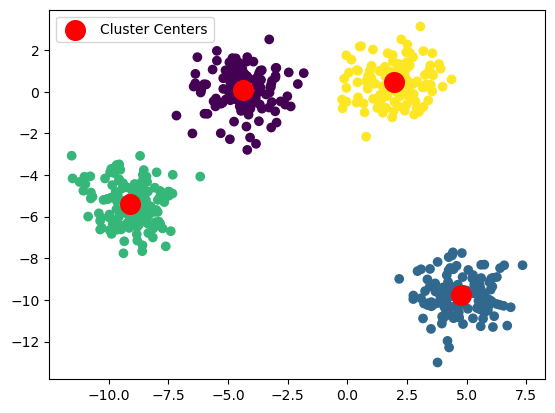

In [37]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state=170
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Generate  data
X,y = make_blobs(n_samples=n_samples, centers=4, n_features=2,random_state=random_state)

varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Predict cluster labels for the data points
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.legend()
plt.show()


## 6. snippet to create different types of scattered data

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

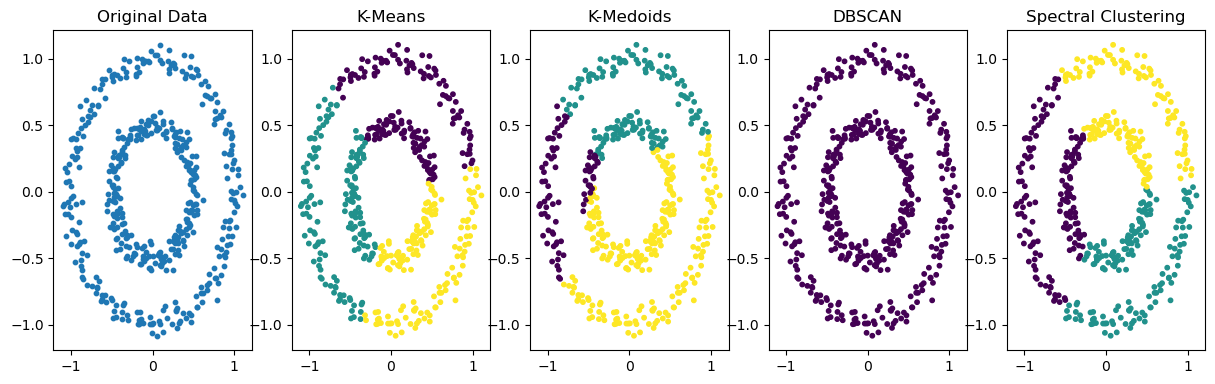

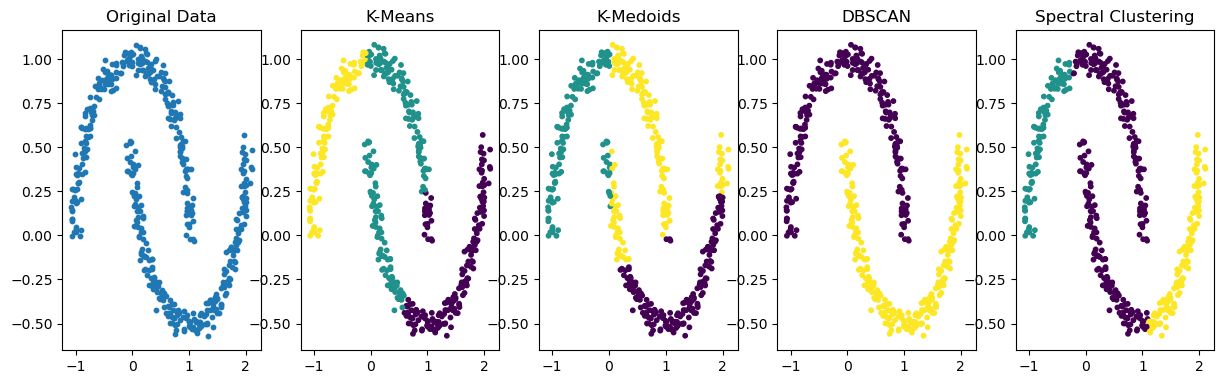

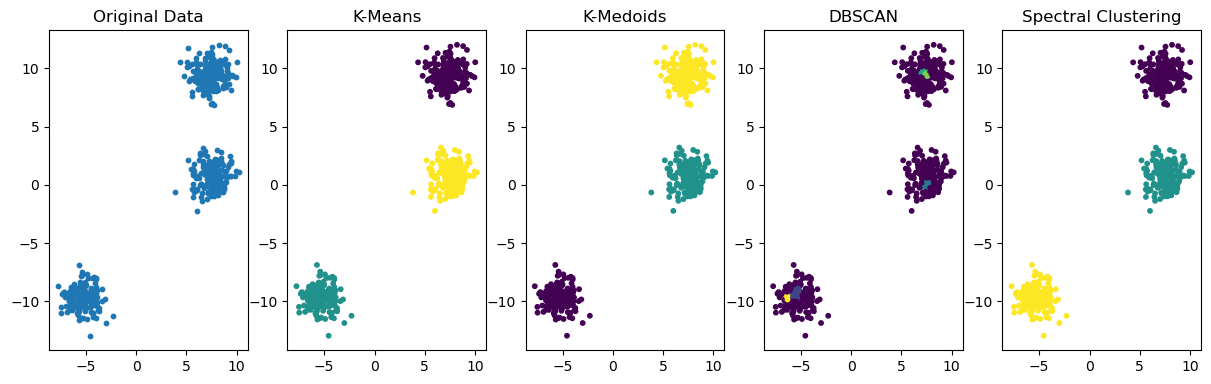

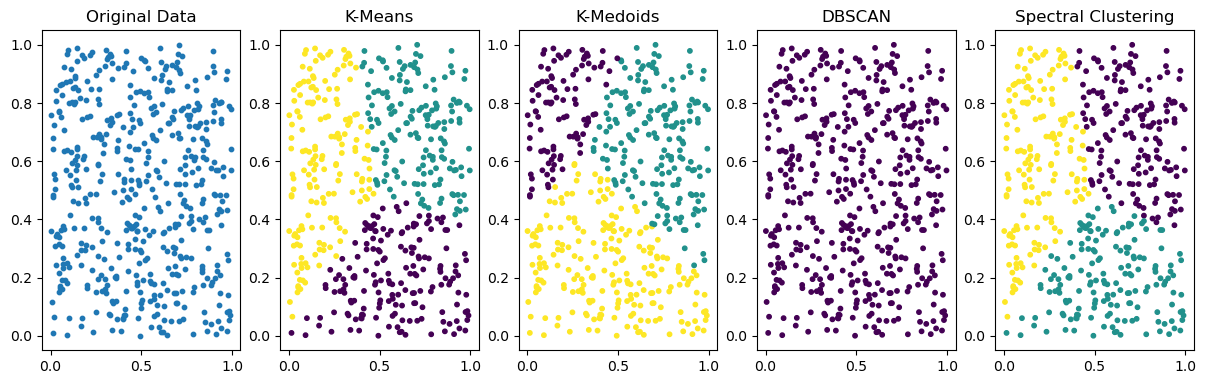

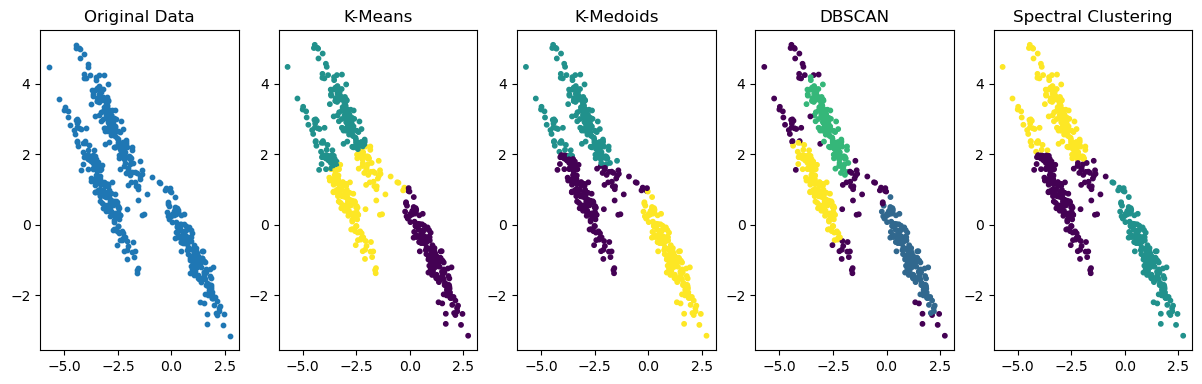

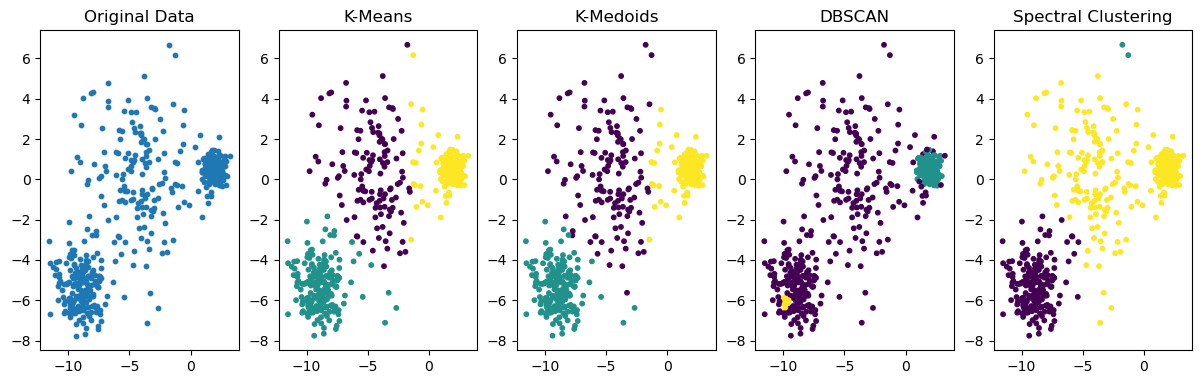

In [40]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import pairwise_distances_argmin_min

class KMedoids(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)

        # Initialize medoids randomly
        n_samples, n_features = X.shape
        medoids_idx = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        medoids = X[medoids_idx]

        for _ in range(self.max_iter):
            # Assign each point to the nearest medoid
            labels, distances = pairwise_distances_argmin_min(X, medoids)
            
            # Compute the new medoids as the point with the minimum total distance
            new_medoids = np.empty_like(medoids)
            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                total_distances = np.sum(pairwise_distances_argmin_min(cluster_points, cluster_points)[1])
                best_medoid_idx = np.argmin(total_distances)
                new_medoids[i] = cluster_points[best_medoid_idx]

            # Check for convergence
            if np.all(new_medoids == medoids):
                break

            medoids = new_medoids

        self.medoids_ = medoids
        self.labels_ = labels

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

# Create a dictionary to store the clustering results for each dataset and algorithm
results = {}

# Define clustering algorithms
algorithms = {
    "K-Means": KMeans(n_clusters=3, random_state=0),
    "K-Medoids": KMedoids(n_clusters=3, random_state=0),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=10),
    "Spectral Clustering": SpectralClustering(n_clusters=3, random_state=0),
}

# Loop through the datasets and apply clustering algorithms
for dataset_name, (X, _) in datasets_list:
    plt.figure(figsize=(12, 4))
    plt.subplots_adjust(left=0.02, right=0.98, bottom=0.1, top=0.9)

    # Plot the original data
    plt.subplot(1, 5, 1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.title("Original Data")
    
    results[dataset_name] = {}

    for algorithm_name, algorithm in algorithms.items():
        algorithm.fit(X)
        labels = algorithm.labels_

        # Plot the clustering results
        plt.subplot(1, 5, len(results[dataset_name]) + 2)
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
        plt.title(algorithm_name)
        results[dataset_name][algorithm_name] = labels

plt.show()
